## Aula 1

In [1]:
#Importando a biblioteca pandas para carregar e visualizar a base de dados
import pandas as pd

In [2]:
passageiros = pd.read_csv('./data/Passageiros.csv')

In [3]:
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [4]:
#Com as bibliotecas seaborn e matplotlib vamos conseguir gerar gráficos para visualizar a base de dados. 
import seaborn as sns
import matplotlib.pyplot as plt

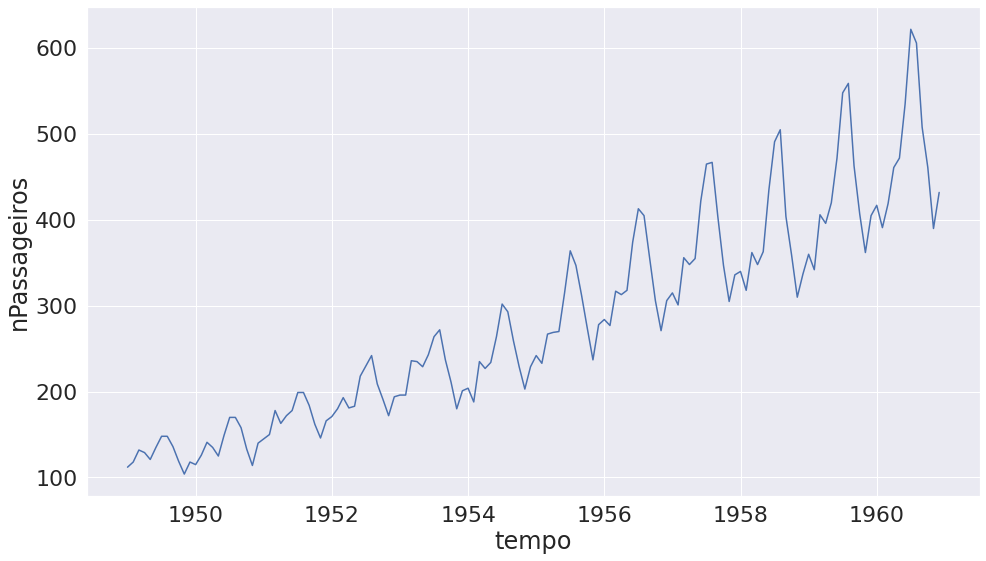

In [5]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="tempo", y="nPassageiros", data=passageiros)

In [6]:
#Seleciona todas as colunas menos a última
Tempo = passageiros.iloc[:,:-1].values

In [7]:
nPassageiros = passageiros.iloc[:,1].values

In [8]:
#Podemos separar parte dos dados para treino e teste
from sklearn.model_selection import train_test_split

In [9]:
Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, 
                                                                                      test_size = 0.3)

In [10]:
from sklearn import linear_model

In [11]:
regressor = linear_model.LinearRegression()

In [12]:
#Ajustando a reta aos dados de treino
regressor.fit(Tempo_treino,nPassageiros_treino)

LinearRegression()

In [13]:
nPassageiros_predito = regressor.predict(Tempo_teste)

In [14]:
import numpy as np

In [15]:
#Colocando os dados em um data frame para posteriormente gerar uma figura com o 
# Seaborn
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito,
             })
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_teste,
             })


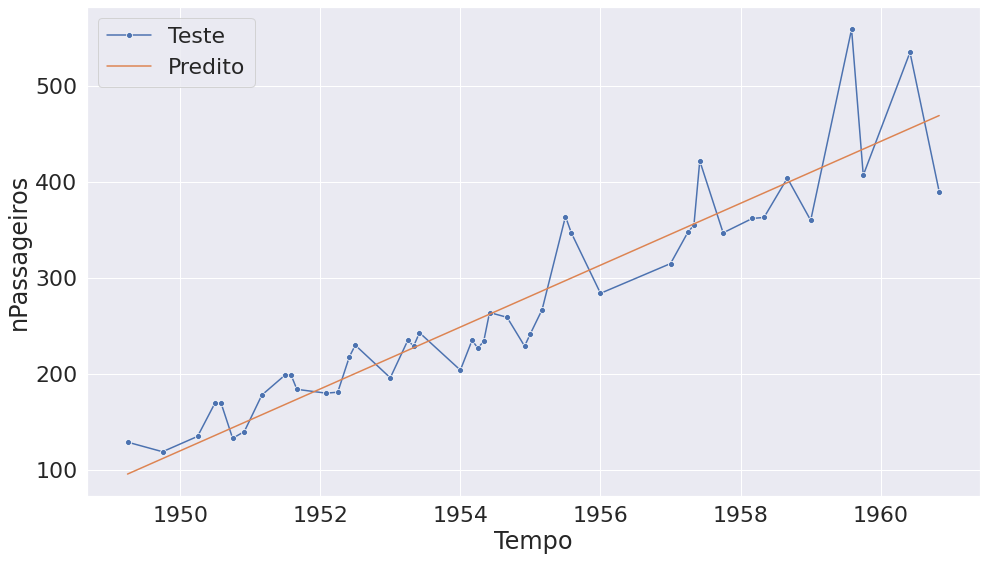

In [16]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )

## Aula 2

In [17]:
regressor.coef_


array([32.23702596])

In [18]:
regressor.intercept_

-62742.286396272044

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2 = r2_score(nPassageiros_teste, nPassageiros_predito)
print(f'Variavel R2 para avaliar/explicar o ajuste da linha prevista: {r2:.2f}')

Variavel R2 para avaliar/explicar o ajuste da linha prevista: 0.87


In [21]:
from sklearn.svm import SVR

In [22]:
regressor_svr = SVR(C=100000)

In [23]:
regressor_svr.fit(Tempo_treino, nPassageiros_treino)

SVR(C=100000)

In [24]:
nPassageiros_predito_svr = regressor_svr.predict(Tempo_teste)

In [25]:
passageiros_predito_svr = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito_svr,})

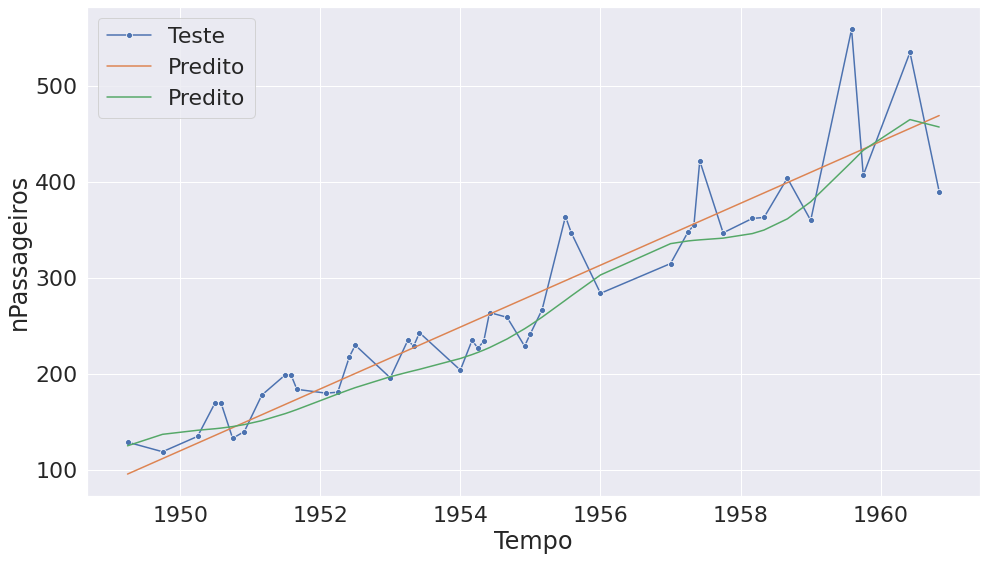

In [26]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito_svr, label = "Predito" )

In [27]:
r2_score(nPassageiros_teste, nPassageiros_predito_svr)

0.8580945985121748

In [28]:
r2_score(nPassageiros_teste, nPassageiros_predito)



0.8661802581677355

In [29]:
celular = pd.read_csv('./data/Celular.csv')

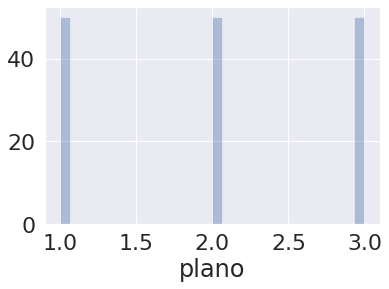

In [30]:
sns.distplot(celular.plano, bins=30, kde=False)

In [31]:
X = celular.iloc[:,:-1].values


In [32]:
y = celular.iloc[:,4].values

In [33]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.3)

In [34]:
from sklearn import tree

In [35]:
classificador_arvore = tree.DecisionTreeClassifier()


In [36]:
classificador_arvore.fit(X_treino, y_treino)

DecisionTreeClassifier()

In [37]:
import graphviz

In [38]:
dot_data = tree.export_graphviz(classificador_arvore, filled=True, out_file=None)

In [39]:
graph = graphviz.Source(dot_data)

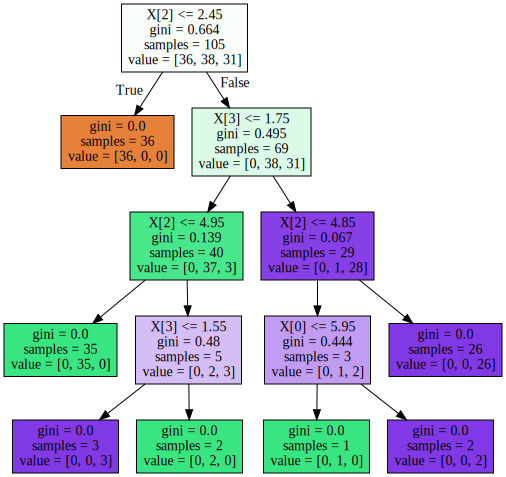

In [40]:
graph

In [41]:
plano_previsto = classificador_arvore.predict(X_teste)

In [42]:
plano_previsto



array([2, 1, 1, 2, 3, 3, 3, 3, 1, 2, 3, 1, 3, 1, 1, 3, 2, 2, 1, 1, 2, 2,
       2, 3, 2, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 2, 3, 1, 2, 2, 3, 3, 2,
       2])

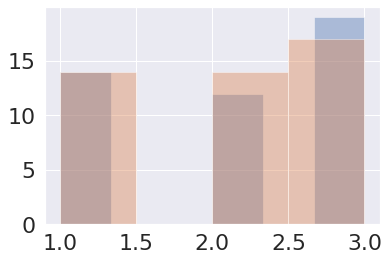

In [43]:
sns.distplot(y_teste, bins=6, kde=False)
sns.distplot(plano_previsto, bins=4, kde=False)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_teste, plano_previsto) * 100


95.55555555555556

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
classificador_vizinho = KNeighborsClassifier(5)

In [48]:
classificador_vizinho.fit(X_treino, y_treino)


KNeighborsClassifier()

In [49]:
plano_previsto_v = classificador_vizinho.predict(X_teste)

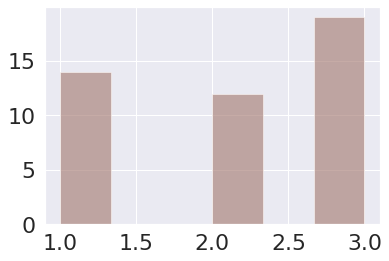

In [50]:
sns.distplot(y_teste, bins=6, kde=False)
sns.distplot(plano_previsto_v, bins=6, kde=False)


In [51]:
accuracy_score(y_teste, plano_previsto_v) * 100

95.55555555555556

In [52]:
plano_previsto_v2 = classificador_vizinho.predict(X_treino)

In [53]:
accuracy_score(y_treino, plano_previsto_v2) * 100



98.09523809523809

In [54]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [55]:
skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
params = {'n_neighbors': [5]}

In [60]:
gs = GridSearchCV(estimator=KNeighborsClassifier(),
                  param_grid=params,
                  cv=skfold,
                  verbose=1,
                  scoring="accuracy",
                  return_train_score=True)

In [61]:
gs.fit(X, y)

Fitting 100 folds for each of 1 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=0),
             estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [5]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [62]:
gs.cv_results_['mean_test_score']

array([0.964])